# Seoul Bike Sharing Demand Data Set
### Assignment for module 2 of IBM ML specialization
#### Pavel Narnov

This assignment contains the data analysis of bicycle renting in Seoul. The dataset was taken from [UCI ML Repository](https://archive.ics.uci.edu/ml/datasets/Seoul+Bike+Sharing+Demand). My goal is to find features which have strong influence to the target variable - Rented Bike count and to train a model which may allow to predict quantity of bikes rented in each hour depending on given conditions.

### 1. Brief description of the data 

In [1]:
import pandas as pd
df = pd.read_csv('SeoulBikeData.csv', encoding='cp1252')
df.head(10)

,Date,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [2]:
df.shape

(8760, 14)

We have 8760 entries and 14 attributes. To understand attributes better I will provide short desription of the dataset from UCI webpage and perform some EDA.

|Attribute|Info|
|---------|----|
|Date:    |year-month-day|
|Rented Bike count|Count of bikes rented at each hour|
|Hour|Hour of the day|
|Temperature|Temperature in Celsius|
|Humidity|%|
|Windspeed|m/s|
|Visibility|10m|
|Dew point temperature|Celsius|
|Solar radiation|MJ/m2|
|Rainfall|mm|
|Snowfall|cm|
|Seasons|Winter, Spring, Summer, Autumn|
|Holiday|Holiday/No holiday|
|Functional Day|NoFunc(Non Functional Hours), Fun(Functional hours)|

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(øC)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(øC)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

Our target variable is Rented Bike Count (col 1). We see that we have integer, float and odject variables, lets analize them and execute feature engineering.

### 2. Feature engineering

Firstly we see from df.info() that we have 8760 entries and all columns don't contain any Null variables so we dont need to perform Null values treatment.

In [4]:
df.isnull().sum()

Date                         0
Rented Bike Count            0
Hour                         0
Temperature(øC)              0
Humidity(%)                  0
Wind speed (m/s)             0
Visibility (10m)             0
Dew point temperature(øC)    0
Solar Radiation (MJ/m2)      0
Rainfall(mm)                 0
Snowfall (cm)                0
Seasons                      0
Holiday                      0
Functioning Day              0
dtype: int64

Hour variable respones for Hour of the day when bike was rented. We see 24 Hours below:

In [5]:
df["Hour"].value_counts()

0     365
1     365
22    365
21    365
20    365
19    365
18    365
17    365
16    365
15    365
14    365
13    365
12    365
11    365
10    365
9     365
8     365
7     365
6     365
5     365
4     365
3     365
2     365
23    365
Name: Hour, dtype: int64

Lets analyze our object variables:

In [6]:
import numpy as np
col_obj = df.dtypes[df.dtypes == np.object]
col_obj = col_obj.index.tolist()
df[col_obj].head()

C:\Users\PNarnov\AppData\Local\Temp\ipykernel_6332\418163288.py:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  col_obj = df.dtypes[df.dtypes == np.object]


,Date,Seasons,Holiday,Functioning Day
0,01/12/2017,Winter,No Holiday,Yes
1,01/12/2017,Winter,No Holiday,Yes
2,01/12/2017,Winter,No Holiday,Yes
3,01/12/2017,Winter,No Holiday,Yes
4,01/12/2017,Winter,No Holiday,Yes


We have 4 object variables, Lets analyze Seasons, Holiday and Func Day.

In [7]:
df['Seasons'].value_counts()

Spring    2208
Summer    2208
Autumn    2184
Winter    2160
Name: Seasons, dtype: int64

In [8]:
df['Holiday'].value_counts()

No Holiday    8328
Holiday        432
Name: Holiday, dtype: int64

In [9]:
df['Functioning Day'].value_counts()

Yes    8465
No      295
Name: Functioning Day, dtype: int64

All our object variables are nominal so we can perform their encoding. We will do one hot encoding for seasons and nominal encoding for Func day and Holiday columns.

In [10]:
dumm_df = pd.get_dummies(df[['Seasons']])
Holiday = []
Func_day = []

for value in df.loc[:, 'Holiday']:
    if value == 'No Holiday':
        Holiday.append(0)
    else:
        Holiday.append(1)
        
for value in df.loc[:, 'Functioning Day']:
    if value == 'No':
        Func_day.append(0)
    else:
        Func_day.append(1)

data = pd.concat([df, dumm_df], axis = 1)
data['Holiday'] = Holiday
data['Functioning Day'] = Func_day
data.drop('Date', axis = 1, inplace = True)
data.drop('Seasons', axis = 1, inplace = True)

data.head()

,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,173,2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,107,3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,78,4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


Futher we need to transform the "Hour" variable. We need to get Night, Morning, Day, Evening to have better understanding of our Bike sharing data.
Lets perform this transformation.

In [11]:
#data1['dep_timezone'] = pd.cut(data1.Dep_Hour, [0,6,12,18,24], labels=['Night','Morning','Afternoon','Evening'])
#data1['dep_timezone']
data['Hour'] = pd.cut(data['Hour'], [-1,5,11,17,23], labels = ['Night','Morning','Day','Evening'])
data.Hour.value_counts()

Night      2190
Morning    2190
Day        2190
Evening    2190
Name: Hour, dtype: int64

In [12]:
data.head()

,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,Night,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
1,204,Night,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
2,173,Night,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1
3,107,Night,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1
4,78,Night,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1


In [13]:
df.head(25)

,Date,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
2,01/12/2017,173,2,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,Winter,No Holiday,Yes
3,01/12/2017,107,3,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,Winter,No Holiday,Yes
4,01/12/2017,78,4,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,Winter,No Holiday,Yes
5,01/12/2017,100,5,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,Winter,No Holiday,Yes
6,01/12/2017,181,6,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,Winter,No Holiday,Yes
7,01/12/2017,460,7,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,Winter,No Holiday,Yes
8,01/12/2017,930,8,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,Winter,No Holiday,Yes
9,01/12/2017,490,9,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,Winter,No Holiday,Yes


In [14]:
data.head(25)

,Rented Bike Count,Hour,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter
0,254,Night,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
1,204,Night,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
2,173,Night,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,1,0,0,0,1
3,107,Night,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1
4,78,Night,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,1,0,0,0,1
5,100,Night,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,1,0,0,0,1
6,181,Morning,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,1,0,0,0,1
7,460,Morning,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,1,0,0,0,1
8,930,Morning,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,1,0,0,0,1
9,490,Morning,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,1,0,0,0,1


In [15]:
days_dumm = pd.get_dummies(data['Hour'])
data = pd.concat([data, days_dumm], axis = 1)
data.drop('Hour', axis = 1, inplace = True)
data.head(25)

,Rented Bike Count,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,Night,Morning,Day,Evening
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,1,0,0,0,1,0,1,0,0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,1,0,0,0,1,0,1,0,0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,1,0,0,0,1,0,1,0,0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,1,0,0,0,1,0,1,0,0


In [16]:
data.rename(columns = {'Seasons_Autumn':'Autumn','Seasons_Spring':'Spring',
                       'Seasons_Summer':'Summer', 'Seasons_Winter':'Winter'}, inplace = True)
data.head(25)

,Rented Bike Count,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter,Night,Morning,Day,Evening
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,1,0,0,0,1,0,1,0,0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,1,0,0,0,1,0,1,0,0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,1,0,0,0,1,0,1,0,0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,1,0,0,0,1,0,1,0,0


In [17]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(øC)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(øC)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   int64  
 10  Functioning Day            8760 non-null   int64  
 11  Autumn                     8760 non-null   uint8  
 12  Spring                     8760 non-null   uint8  
 13  Summer                     8760 non-null   uint8

In [18]:
data.shape

(8760, 19)

After performing feature engineering we have 16 columns instead of 14 and don't have object variables.

In [19]:
data['Holiday'].value_counts()

0    8328
1     432
Name: Holiday, dtype: int64

In [20]:
data['Functioning Day'].value_counts()

1    8465
0     295
Name: Functioning Day, dtype: int64

### Let's analyze the distribution of our target variable:

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


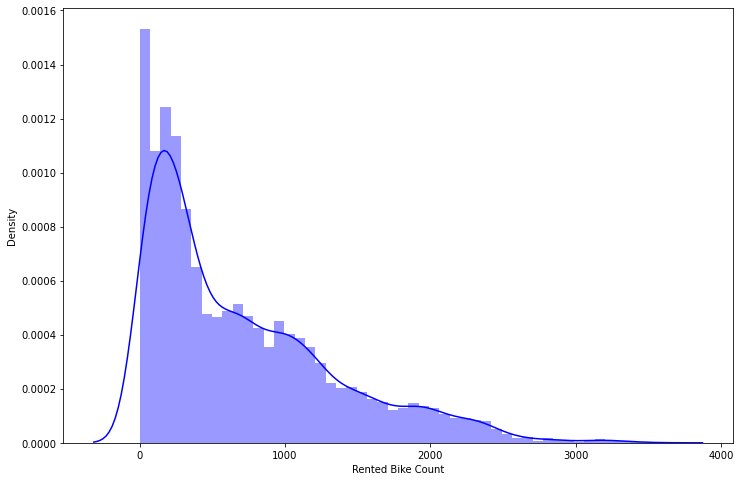

In [21]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize = (12,8))
sns.distplot(data['Rented Bike Count'], color = 'b', bins = 50)
plt.show()

We see that our target variable is right skewed.

In [22]:
data['Rented Bike Count'].skew()

1.1534281773679014

We have strong positive skewness of our target variable.

In [23]:
from scipy.stats import normaltest
normaltest(data['Rented Bike Count'].values)

NormaltestResult(statistic=1415.73323838599, pvalue=3.779491395679156e-308)

The normal test also shows us that we are very far from the normal distribution.

Since we have some entries equal to 0 we cannot perform boxcox and log transforming of our target variable. We may perform only sqrt transforming. Lets check how it works:

In [24]:
sqrt_target = np.sqrt(data['Rented Bike Count'])

C:\Users\PNarnov\Anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


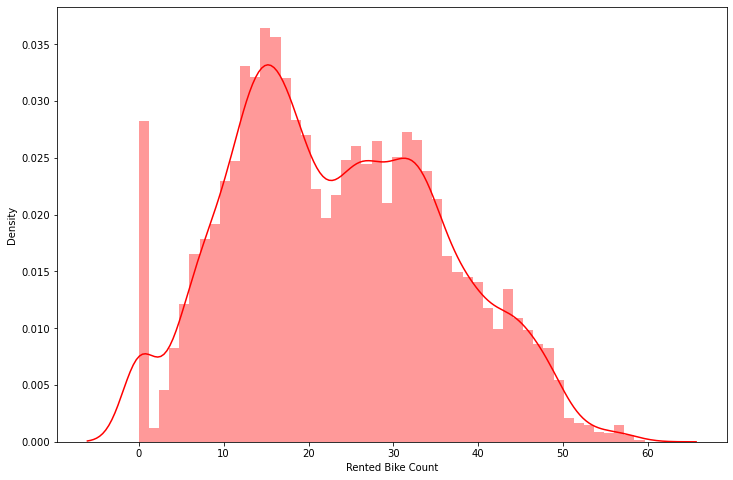

In [25]:
plt.figure(figsize = (12,8))
sns.distplot(sqrt_target, color = 'r', bins = 50)
plt.show()

Now our variable is more normally distributed.

In [26]:
sqrt_target.skew()

0.237362090985412

And we see that our skewness is less.

In [27]:
normaltest(sqrt_target)

NormaltestResult(statistic=455.6349868822935, pvalue=1.148470164788618e-99)

But the normal test shows that we still don't have normal distribution of the target variable. But our results are much better now. p_value is much more higher.

### Analysis of correlations:

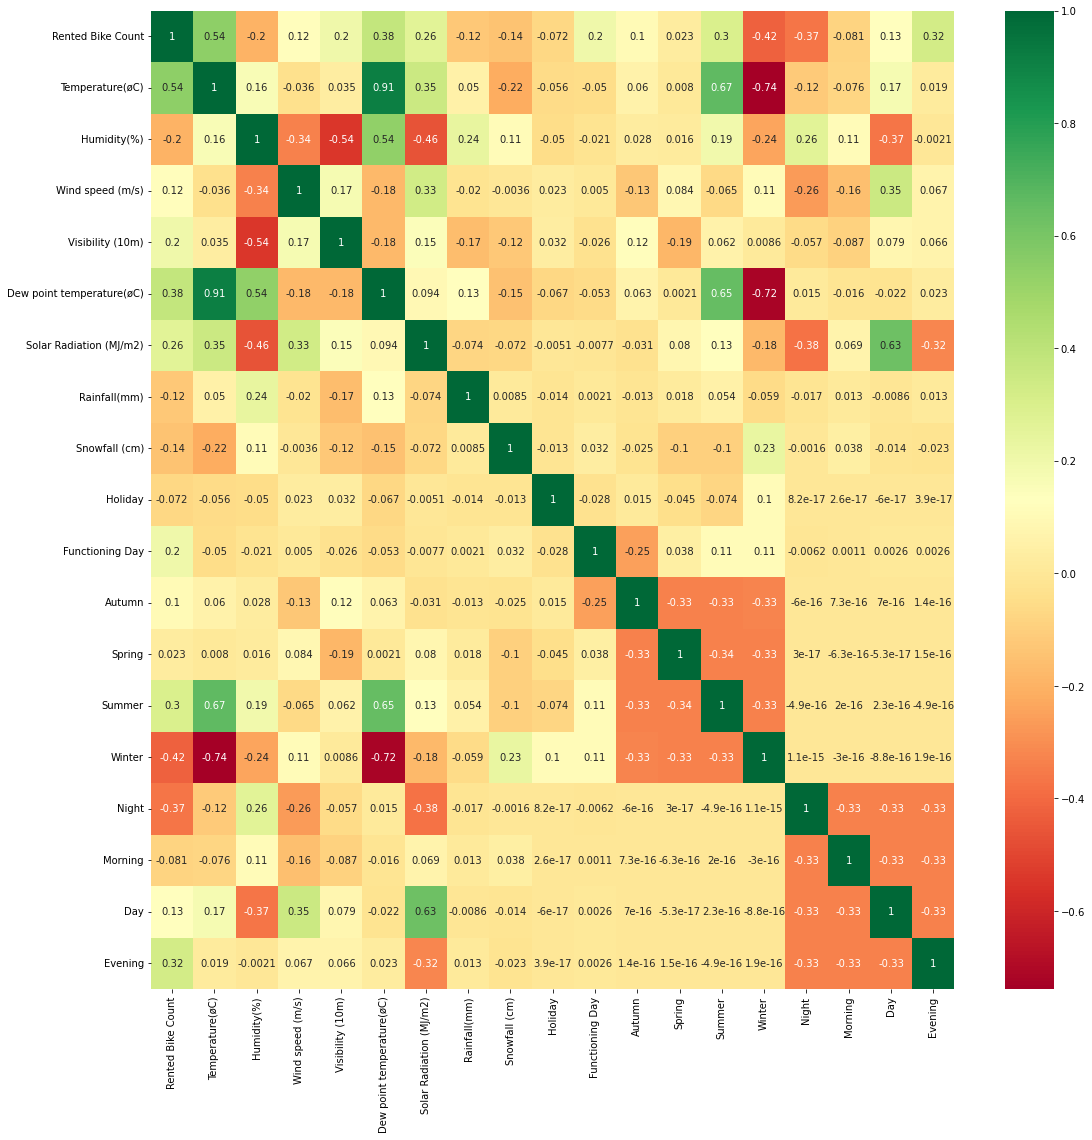

In [28]:
plt.figure(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,cmap='RdYlGn')

plt.show()

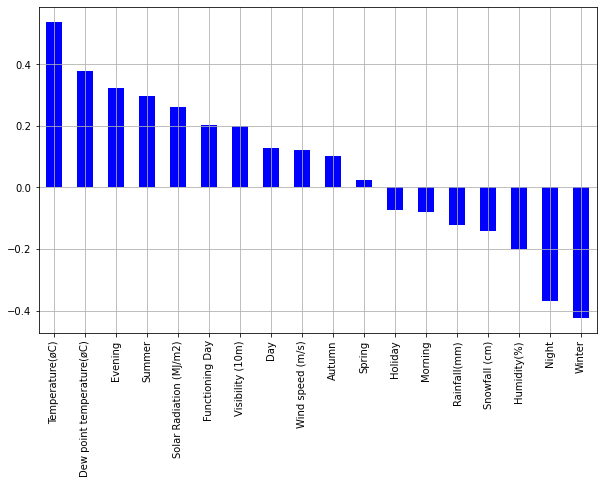

In [29]:
corr_target = data.corr()['Rented Bike Count'].sort_values(ascending = False)

plt.figure(figsize = (10,6))
corr_target[1:].plot(kind = 'bar', color = 'blue')
plt.grid()
plt.show()

We mostly see weak correlation between features and the target feature but several features have positive and negative middle correlation.
Positive features are: Temp, Dew point temp, Evening, Summer. Negative features are: Night and winter.

### 3. Modelling
a. Simple linear model checking influence of target variable distribution   
b. Lasso model which we need find the strongest features   
c. Ridge model with GridSearch CV and getting the best hyperparameters and parameters for prediction 

Firstly we are importing our libraries

In [30]:
import numpy as np
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import r2_score, mean_squared_error
from sklearn.pipeline import Pipeline

In [31]:
data.head(10)

,Rented Bike Count,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter,Night,Morning,Day,Evening
0,254,-5.2,37,2.2,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
1,204,-5.5,38,0.8,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
2,173,-6.0,39,1.0,2000,-17.7,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
3,107,-6.2,40,0.9,2000,-17.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
4,78,-6.0,36,2.3,2000,-18.6,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
5,100,-6.4,37,1.5,2000,-18.7,0.00,0.0,0.0,0,1,0,0,0,1,1,0,0,0
6,181,-6.6,35,1.3,2000,-19.5,0.00,0.0,0.0,0,1,0,0,0,1,0,1,0,0
7,460,-7.4,38,0.9,2000,-19.3,0.00,0.0,0.0,0,1,0,0,0,1,0,1,0,0
8,930,-7.6,37,1.1,2000,-19.8,0.01,0.0,0.0,0,1,0,0,0,1,0,1,0,0
9,490,-6.5,27,0.5,1928,-22.4,0.23,0.0,0.0,0,1,0,0,0,1,0,1,0,0


In [32]:
data.shape

(8760, 19)

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Rented Bike Count          8760 non-null   int64  
 1   Temperature(øC)            8760 non-null   float64
 2   Humidity(%)                8760 non-null   int64  
 3   Wind speed (m/s)           8760 non-null   float64
 4   Visibility (10m)           8760 non-null   int64  
 5   Dew point temperature(øC)  8760 non-null   float64
 6   Solar Radiation (MJ/m2)    8760 non-null   float64
 7   Rainfall(mm)               8760 non-null   float64
 8   Snowfall (cm)              8760 non-null   float64
 9   Holiday                    8760 non-null   int64  
 10  Functioning Day            8760 non-null   int64  
 11  Autumn                     8760 non-null   uint8  
 12  Spring                     8760 non-null   uint8  
 13  Summer                     8760 non-null   uint8

#### a. Simple linear model to estimate influence of distribution of the target variable 

In [34]:
y_col = 'Rented Bike Count'
#features = data[x for x in data.columns if x != y_col]
X = data.drop('Rented Bike Count', axis = 1)
y = data[y_col]
X.head()

,Temperature(øC),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(øC),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Holiday,Functioning Day,Autumn,Spring,Summer,Winter,Night,Morning,Day,Evening
0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0
1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0
2,-6.0,39,1.0,2000,-17.7,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0
3,-6.2,40,0.9,2000,-17.6,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0
4,-6.0,36,2.3,2000,-18.6,0.0,0.0,0.0,0,1,0,0,0,1,1,0,0,0


In [35]:
print('X shape:', X.shape)
print('Y shape:', y.shape)

X shape: (8760, 18)
Y shape: (8760,)


The first model will be with naturally distributed y variable(without sqrt transormation)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
s = StandardScaler()
X_train_ss = s.fit_transform(X_train).astype('float')
lr = LinearRegression()
lr.fit(X_train_ss, y_train)
X_test_ss = s.transform(X_test)
y_hat = lr.predict(X_test_ss)
score_lr = r2_score(y_test, y_hat)
MSE_lr = mean_squared_error(y_test, y_hat)
print('r2 score for simple linear regression:', score_lr)
print('MSE for simple linear regression:', MSE_lr)

r2 score for simple linear regression: 0.5845802249986709
MSE for simple linear regression: 180160.17332204364


We have r2_score which equals to 0.58 which is not so high value.
Lets check how linear regression performs with more normally distributed target variable.
We also see that our result of r2_score is better than in the first version of this assignment (where r2 was 0.55)

In [37]:
X_train_ss = s.fit_transform(X_train).astype('float')
y_train_dist = np.sqrt(y_train)
lr = LinearRegression()
lr.fit(X_train_ss, y_train_dist)
X_test_ss = s.transform(X_test)
y_hat_dist = lr.predict(X_test_ss)
y_hat = y_hat_dist**2
score_lr_dist = r2_score(y_test, y_hat)
MSE_lr_dist = mean_squared_error(y_test, y_hat)
print('r2 score for simple linear regression with normally distributed target:', score_lr_dist)
print('MSE for simple linear regression with normally distributed target:', MSE_lr_dist)

r2 score for simple linear regression with normally distributed target: 0.6150346629497029
MSE for simple linear regression with normally distributed target: 166952.6248377044


We have little bit higher r2_score and lower MSE in the second model which proves a statement that normally distributed target variable is essential for linear regression modelling

r2 score for training data:

In [38]:
r2_score(y_train_dist, lr.predict(X_train_ss))

0.679033335748372

Looking at r2_score it seems that our model is underfitted.

Lets check the same using with MinMax Scaler:

In [39]:
minmax = MinMaxScaler()
X_train_mm = minmax.fit_transform(X_train).astype('float')
y_train_dist = np.sqrt(y_train)
lr_m = LinearRegression()
lr_m.fit(X_train_mm, y_train_dist)
X_test_mm = minmax.transform(X_test)
y_hat_dist = lr_m.predict(X_test_mm)
y_hat = y_hat_dist**2
score_lr_mm = r2_score(y_test, y_hat)
MSE_lr_mm = mean_squared_error(y_test, y_hat)
print('r2 score for simple linear regression with normally distributed target and MM scaler:', score_lr_mm)
print('MSE for simple linear regression with normally distributed target and MM scaler:', MSE_lr_mm)

r2 score for simple linear regression with normally distributed target and MM scaler: 0.6163246537528564
MSE for simple linear regression with normally distributed target and MM scaler: 166393.17875288756


Results are very similar to the second modelling with more normal distributed target variable.

Coefficient analyzing:

In [41]:
lr_m.coef_

array([ 9.96751133e+00, -2.47266210e+01,  1.35024192e+00,  3.96273773e-01,
        2.01004384e+01, -1.79889144e+00, -4.78579948e+01,  2.70488142e+00,
       -2.94237776e+00,  2.80349992e+01, -1.17025950e+13, -1.17025950e+13,
       -1.17025950e+13, -1.17025950e+13,  3.94059314e+14,  3.94059314e+14,
        3.94059314e+14,  3.94059314e+14])

In [42]:
coef_vals = pd.DataFrame(zip(X.columns.values, lr_m.coef_))
coef_vals.sort_values(by = 1)

,0,1
13,Winter,-1.170260e+13
12,Summer,-1.170260e+13
11,Spring,-1.170260e+13
10,Autumn,-1.170260e+13
6,Rainfall(mm),-4.785799e+01
1,Humidity(%),-2.472662e+01
8,Holiday,-2.942378e+00
5,Solar Radiation (MJ/m2),-1.798891e+00
3,Visibility (10m),3.962738e-01
2,Wind speed (m/s),1.350242e+00


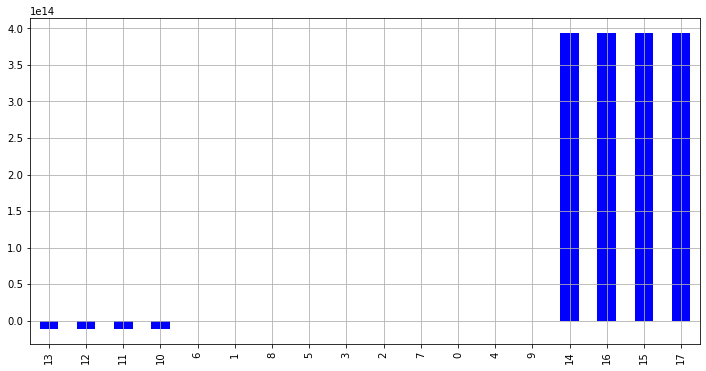

In [43]:
plt.figure(figsize = (12,6))
coef_vals.iloc[:,1].sort_values().plot(kind = 'bar', color = 'blue')
plt.grid()
plt.show()

The results seem to be very strange and confusing. They don't provide us with any insights.   
Hope lasso regression will give us better results.

#### b. Lasso regression and finding the most essential parameters 

In [44]:
kf = KFold(shuffle = True, random_state = 10000, n_splits = 4)
alphas = np.geomspace(0.01, 10, 4)
scores = []
predictions = {}
for alpha in alphas:
    estimator = Pipeline([('degree', PolynomialFeatures(degree = 2)), 
                          ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = alpha, max_iter = 100000))])
    prediction = cross_val_predict(estimator, X, y, cv = kf)
    predictions[alpha] = prediction
    r2_sc = r2_score(y, prediction)
    scores.append(r2_sc)
    print('for alpha = ', alpha, ' r2score:', r2_sc)

for alpha =  0.01  r2score: 0.7452654825702507
for alpha =  0.1  r2score: 0.7483195890069019
for alpha =  1.0  r2score: 0.7240062712598856
for alpha =  10.0  r2score: 0.6049763616238637


We see that r2_score has been increased in comparison with the simple linear regression modelling.    
Now we can estimate our parameters.

Lets analyze results for alpha = 0.1, 1 and 10 to understand what features have the strongest impact:

#### For begining lets analyze the most regularized model with the highest alpha = 10

In [45]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
estimator = Pipeline([('degree', PolynomialFeatures(degree = 2)), 
                      ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = 10, max_iter = 100000))])
estimator.fit(X_train, y_train)
y_hat = estimator.predict(X_test)
score = r2_score(y_test, y_hat)
coefs = estimator.named_steps["Regression"].coef_
print('Coefficients for our lasso regression with alpha = 10:')
print(' ')
print(coefs)

Coefficients for our lasso regression with alpha = 10:
 
[ 0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00  8.76713700e+01  0.00000000e+00
  0.00000000e+00  0.00000000e+00 -1.21519822e+02 -1.91602112e+02
 -0.00000000e+00  0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00  0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  9.90244190e+02  0.00000000e+00  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  4.67667184e+02 -5.00751244e+02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  0.00000000e+00 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -0.00000000e+00 -0.00000000e+00  0.00000000e+00
  0.00000000e+00 -0.00000000e+00  0.00000000e+00  0.00000000e+00
  0.00000000e+00  0.00000000e+00 

In [46]:
coef_quant = 0
for value in coefs:
    if value != 0:
        print(value)
        coef_quant += 1
print(' ')
print('Quantity of not null coefficients for alpha = 10.0:', coef_quant)

87.67136997966176
-121.51982194501677
-191.60211243084908
990.2441896225184
467.66718406964094
-500.751244223719
107.4126794404858
-114.18882636090848
-33.38549971405201
47.42172942557726
110.26073907146223
-0.14602727831283124
-18.17745406311986
15.289390364353347
173.8557939098592
169.81406501738815
-0.012281400827186493
-40.53371445402139
-2.746268985935434
 
Quantity of not null coefficients for alpha = 10.0: 19


We have 19 not null coefficients for alpha = 10.0.
We should analyze impact of every feature on the target.

In [47]:
df_importances = pd.DataFrame(zip(estimator.named_steps["degree"].get_feature_names(),
                 estimator.named_steps["Regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
col_names_dict

C:\Users\PNarnov\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


{0: 'Temperature(øC)',
 1: 'Humidity(%)',
 2: 'Wind speed (m/s)',
 3: 'Visibility (10m)',
 4: 'Dew point temperature(øC)',
 5: 'Solar Radiation (MJ/m2)',
 6: 'Rainfall(mm)',
 7: 'Snowfall (cm)',
 8: 'Holiday',
 9: 'Functioning Day',
 10: 'Autumn',
 11: 'Spring',
 12: 'Summer',
 13: 'Winter',
 14: 'Night',
 15: 'Morning',
 16: 'Day',
 17: 'Evening'}

In [48]:
df_importances = df_importances[df_importances[1] != 0]
df_importances.sort_values(by=1)

,0,1
37,x1^2,-500.751244
15,x14,-191.602112
14,x13,-121.519822
80,x3 x13,-114.188826
179,x13 x17,-40.533714
81,x3 x14,-33.385500
150,x9 x14,-18.177454
180,x14^2,-2.746269
149,x9 x13,-0.146027
175,x13^2,-0.012281


Lasso analysis with alpha = 10 shows us that the strongest features which have the highest negative effect are:   
Humidity squared, night time and winter season. It seems reasonable that people rent bikes less at night time, in winter season and during the rain when humidity is high. We also see high negative impact of winter and visibility combination it gives us an insight that during bad weather conditions people rent bikes less. And we see these conditions from pur analysis.
   
Important features with positive effect are:
Combination of temperature and func day, temperature and evening time and func day with evening as well as combination of summertime and evening.   
It seems reasonable that good weather with high temperature havs strong influence on quantity of bikers in the streets. People also try to rent bikes at evening time beacouse it's comfortable to go home after work using bikes or to have some sport activities after working day.  

#### Lets analyze the most regularized model with the alpha = 1

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
estimator = Pipeline([('degree', PolynomialFeatures(degree = 2)), 
                      ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = 1, max_iter = 100000))])
estimator.fit(X_train, y_train)
y_hat = estimator.predict(X_test)
score = r2_score(y_test, y_hat)
coefs = estimator.named_steps["Regression"].coef_
coef_quant = 0
for value in coefs:
    if value != 0:
        print(value)
        coef_quant += 1
print(' ')
print('Quantity of not null coefficients for alpha = 1.0:', coef_quant)

476.06634882378563
-17.1988942073676
353.1149538253705
809.1190368914993
1203.8297553394596
-8.93512893153088
-67.95540667354331
119.32758911927505
1044.6793435757472
-800.744343303394
183.95423599570984
4.885711492326769
488.4988595323822
396.8471563333219
-38.917490026098555
7.059046901193412
91.06318044216117
-70.39770820373676
-75.46147808757536
169.92451424958725
43.341631003065494
-87.91599716788846
-77.29562231591284
-21.661438503489443
-492.2657910158943
-473.99263217939324
50.55832426121652
819.833685861921
-776.5125628562786
-84.07867320965873
24.163211340976996
-78.02434227383375
106.87082377262341
200.89685888956896
372.7392595989924
-369.3357970615501
252.45499309244113
318.0138982345911
-41.43278113973253
-74.67746294289894
20.7256477326306
98.2761041547403
213.40572923690593
-67.06236845002901
-32.37009380673995
 
Quantity of not null coefficients for alpha = 1.0: 45


We see that we have much more non zero coefficients with alpha = 1.0 (with weaker regularization)

In [50]:
df_importances = pd.DataFrame(zip(estimator.named_steps["degree"].get_feature_names(),
                 estimator.named_steps["Regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances = df_importances[df_importances[1] != 0]
df_importances.sort_values(by=1)

{0: 'Temperature(øC)', 1: 'Humidity(%)', 2: 'Wind speed (m/s)', 3: 'Visibility (10m)', 4: 'Dew point temperature(øC)', 5: 'Solar Radiation (MJ/m2)', 6: 'Rainfall(mm)', 7: 'Snowfall (cm)', 8: 'Holiday', 9: 'Functioning Day', 10: 'Autumn', 11: 'Spring', 12: 'Summer', 13: 'Winter', 14: 'Night', 15: 'Morning', 16: 'Day', 17: 'Evening'}
 


C:\Users\PNarnov\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
37,x1^2,-800.744343
115,x6 x9,-776.512563
85,x4^2,-492.265791
99,x5^2,-473.992632
150,x9 x14,-369.335797
80,x3 x13,-87.915997
142,x8 x15,-84.078673
144,x8 x17,-78.024342
81,x3 x14,-77.295622
75,x3 x8,-75.461478


Lower regularization coefficient shows us different combination of strong features and gives us additional interesting insights.
Humidity squared still has the strongest negative effect.   
We see that when we have raining weather with lots of rainfall during func day people avoid to rent bikes.   
Dew point temperature squared has strong negative influence as well as solar radiation squared. It seems that these parametrs are connected with hot weather when people try to avoid street activities.    
   
The strongest positive parameter here is the combination of temperature and spring (people often rent bikes after winter season end and good weather starts).   
The combination of high temperature and evening still has very strong impact.   
We see new insight that the combination of solar radiation and evening time has strong impact. People often rent bikes at evenings with good sunny weather.   
The combination of high temperature and autumn has high influence as well.

### r2_score for 3rd poly degree 

In [134]:
np.geomspace(0.1, 10, 3)

array([ 0.1,  1. , 10. ])

In [135]:
kf = KFold(shuffle = True, random_state = 10000, n_splits = 4)
alphas = np.geomspace(0.1, 10, 3)
scores = []
predictions = {}
for alpha in alphas:
    estimator = Pipeline([('degree', PolynomialFeatures(degree = 3)), 
                          ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = alpha, max_iter = 100000))])
    prediction = cross_val_predict(estimator, X, y, cv = kf)
    predictions[alpha] = prediction
    r2_sc = r2_score(y, prediction)
    scores.append(r2_sc)
    print('for alpha = ', alpha, ' r2score:', r2_sc)

for alpha =  0.1  r2score: 0.770271655129665
for alpha =  1.0  r2score: 0.7433320733506747
for alpha =  10.0  r2score: 0.620557042301429


In [136]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
estimator = Pipeline([('degree', PolynomialFeatures(degree = 3)), 
                      ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = 10, max_iter = 100000))])
estimator.fit(X_train, y_train)
y_hat = estimator.predict(X_test)
score = r2_score(y_test, y_hat)
coefs = estimator.named_steps["Regression"].coef_

df_importances = pd.DataFrame(zip(estimator.named_steps["degree"].get_feature_names(),
                 estimator.named_steps["Regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances = df_importances[df_importances[1] != 0]
df_importances.sort_values(by=1)

{0: 'Temperature(øC)', 1: 'Humidity(%)', 2: 'Wind speed (m/s)', 3: 'Visibility (10m)', 4: 'Dew point temperature(øC)', 5: 'Solar Radiation (MJ/m2)', 6: 'Rainfall(mm)', 7: 'Snowfall (cm)', 8: 'Holiday', 9: 'Functioning Day', 10: 'Autumn', 11: 'Spring', 12: 'Summer', 13: 'Winter', 14: 'Night', 15: 'Morning', 16: 'Day', 17: 'Evening'}
 


C:\Users\PNarnov\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
361,x1^3,-5.312695e+02
180,x14^2,-1.687581e+02
14,x13,-1.651536e+02
15,x14,-6.438994e+01
80,x3 x13,-5.214464e+01
755,x3 x13^2,-7.416130e+00
729,x3 x9 x13,-4.747190e+00
175,x13^2,-5.934264e-02
149,x9 x13,-5.209921e-02
1169,x9^2 x13,-2.463789e-03


In [53]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 10000)
estimator = Pipeline([('degree', PolynomialFeatures(degree = 3)), 
                      ('scaler', MinMaxScaler()), ('Regression', Lasso(alpha = 1, max_iter = 100000))])
estimator.fit(X_train, y_train)
y_hat = estimator.predict(X_test)
score = r2_score(y_test, y_hat)
coefs = estimator.named_steps["Regression"].coef_

df_importances = pd.DataFrame(zip(estimator.named_steps["degree"].get_feature_names(),
                 estimator.named_steps["Regression"].coef_,
))
col_names_dict = dict(zip(list(range(len(X.columns.values))), X.columns.values))
print(col_names_dict)
print(' ')
df_importances = df_importances[df_importances[1] != 0]
df_importances.sort_values(by=1)

{0: 'Temperature(øC)', 1: 'Humidity(%)', 2: 'Wind speed (m/s)', 3: 'Visibility (10m)', 4: 'Dew point temperature(øC)', 5: 'Solar Radiation (MJ/m2)', 6: 'Rainfall(mm)', 7: 'Snowfall (cm)', 8: 'Holiday', 9: 'Functioning Day', 10: 'Autumn', 11: 'Spring', 12: 'Summer', 13: 'Winter', 14: 'Night', 15: 'Morning', 16: 'Day', 17: 'Evening'}
 


C:\Users\PNarnov\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,0,1
361,x1^3,-745.295738
999,x6 x9^2,-405.547430
194,x0^2 x4,-373.209292
99,x5^2,-352.769936
150,x9 x14,-348.696693
...,...,...
929,x5 x9 x17,461.319262
435,x1 x5 x17,504.979182
317,x0 x9 x10,557.132287
201,x0^2 x11,832.075700


Firstly we see that we have better f1 score results for modeling with the 3rd poly degree.   
We also see additional insights but some of them are less sutable for interpretation.
The main thing which I can conclude that model interpretation is much better for insights receiving then simple correlation analysis. We have much more curious insights using moddeling to get them. And the main profit of modeling is that we see different combinations of arguments with strong or weak influence on the target variable. 

### Lasso results:

We see 5 strogest positive and negative features.   
We see strong positive impact of Spring (x12) and Summer (x13) seasons, as well as working hour(x0) with temperature(x1). Warm temperature in spring and Autumn has good influens on bike renting.
We see strong negative impact of Working hour (x0) with Humidity (x2) and Rainfall (x7) with Func day(x10).

We can start performing Ridge regression via GridSearch CV to get best prediction parameters for our model. 

#### c. Ridge regression via GridSearch CV 

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 10000)

In [37]:
from sklearn.model_selection import GridSearchCV

#kf = KFold(shuffle = True, random_state = 10000, n_splits = 4)

estimator = Pipeline([
    ("polynomial_features", PolynomialFeatures()),
    ("scaler", MinMaxScaler()),
    ("ridge_regression", Ridge(max_iter = 10000))
])

params = {
    'polynomial_features__degree': [3, 4, 5],
    'ridge_regression__alpha': np.geomspace(0.001, 10, 8)
}
    
grid = GridSearchCV(estimator, params, cv = 4)
grid.fit(X_train, np.sqrt(y_train))

print('Best score:', grid.best_score_, 'Best params:', grid.best_params_)

Best score: 0.7952958609388747 Best params: {'polynomial_features__degree': 3, 'ridge_regression__alpha': 10.0}


In [38]:
y_hat = grid.best_estimator_.predict(X_test)
r2_score(y_test, y_hat**2)

0.7833705790024776

We found our best hyperparameters for this model and got about 78% of prediction accuracy.   
It is better than in previos version of this assignment where it was 72%. 

### 4. Summary key findings and insights

1. The results of simple linear regression modelling shows us that normally distributed target variable has higher r2 score and better prediction ability.
2. Lasso regression is very powerful tool for the model interpretation task.
3. I built the predictive model with Ridge regression using Grid Search CV and got good results with high r2 score.
4. The main difference between this assignment version and the previous one that I made a bin transformation of "Hour" variable and got better prediction results and much better interpretation results which are sutable for business intelligence task. 

### Best regards
# Pavel Narnov